In [2]:
from manim import *
from typing import Tuple

Manim Community v0.16.0.post0

## Testando o comportamento do objeto `Angle`

Ele possui os seguintes parâmetros:
- line1: Line
- line2: Line
- radius: float
- quadrant: Tuple[-1 | 1, -1 | 1]

In [2]:
%%manim -qm -v WARNING LearnAngle 
class TrianguloData(VGroup):
    def __init__(
        self, 
        vertices: Tuple[
            Tuple[float, float, float], 
            Tuple[float, float, float], 
            Tuple[float, float, float]
        ] = (
            (-2, -1, 0),
            (2, -1, 0),
            (0, 2, 0), 
        ),
        *vmobjects, 
        **kwargs
        ):
        super().__init__(*vmobjects, **kwargs)

        arestas = VGroup(
            Line(vertices[0], vertices[1], color=RED),
            Line(vertices[1], vertices[2], color=GREEN),
            Line(vertices[2], vertices[0], color=BLUE),
        )

        angulos_forma = VGroup(
            Angle(arestas[0], arestas[1], radius=0.5, quadrant=(-1, 1), other_angle=True, color=BLUE),
            Angle(arestas[1], arestas[2], radius=0.5, quadrant=(-1, 1), other_angle=True, color=RED),
            Angle(arestas[2], arestas[0], radius=0.5, quadrant=(-1, 1), other_angle=True, color=GREEN),            
        )

        angulo_labels = VGroup(
            MathTex("\\widehat{C}", color=BLUE).move_to(angulos_forma[0].get_center() + 0.35*LEFT+0.2*UP).scale(0.5),
            MathTex("\\widehat{A}", color=RED).move_to(angulos_forma[1].get_center() + 0.35*DOWN).scale(0.5),
            MathTex("\\widehat{B}", color=GREEN).move_to(angulos_forma[2].get_center() + 0.35*RIGHT+0.2*UP).scale(0.5),
        )

        angulos = VGroup(
            *[
                VGroup(angulos_forma[i], angulo_labels[i]) 
                for i in range(len(angulos_forma))
            ]
        )

        braces = [
            BraceBetweenPoints(arestas[0].points[0], arestas[0].points[-1]),
            BraceBetweenPoints(arestas[1].points[0], arestas[1].points[-1]),
            BraceBetweenPoints(arestas[2].points[0], arestas[2].points[-1]),
        ]

        braces_labels = [
            MathTex("a").move_to(braces[0].get_center() + 0.35*DOWN).scale(0.8),
            MathTex("b").move_to(braces[1].get_center() + 0.5*RIGHT+0.3*UP).scale(0.8),
            MathTex("c").move_to(braces[2].get_center() + 0.5*LEFT+0.3*UP).scale(0.8),
        ]

        lengths = VGroup(
            *[
                VGroup(braces[i], braces_labels[i])
                for i in range(len(braces))
            ]
        )

        circulo = Circle(radius=2.15, color=YELLOW).move_to(0.15*DOWN)

        self.add(arestas, lengths, angulos, circulo)

    @property
    def arestas(self):
        return self[0]

    @property
    def lengths(self):
        return self[1]

    @property
    def angulos(self):
        return self[2]

    @property
    def circulo(self):
        return self[3]

            
class LearnAngle(Scene):
    def construct(self):
        triangulo = TrianguloData()
        formula = MathTex('\\frac{a}{sen(\\widehat{A})} = \\frac{b}{sen(\\widehat{B})} = \\frac{c}{sen(\\widehat{C})} = 2R').scale(0.8)
        
        self.play(Write(triangulo.arestas))
         

In [33]:
%%manim -ql -v WARNING LeiSenos

class LeiSenos(Scene):
    def construct(self):
        self.formula = MathTex('\\frac{a}{sen(\\widehat{A})} = \\frac{b}{sen(\\widehat{B})} = \\frac{c}{sen(\\widehat{C})} = 2R').scale(0.8)
        self.play(Write(self.formula))

In [7]:
%%manim -qm -v WARNING Formula

class Formula(Scene):
    def construct(self):
        modulo_produto_vetorial = MathTex(r"\left | \vec{u} \times \vec{v} \right | = \left | \vec{u} \right | \cdot \left | \vec{v} \right | \cdot sen(\theta)")
        self.play(Write(modulo_produto_vetorial))

In [9]:
%%manim -qm -v WARNING Lista  

class Lista(Scene):
    def construct(self):
        topics = BulletedList(
            '($\\vec{u}$, $\\vec{v}$) é LD (Linearmente dependente) se $\\vec{u}$ e $\\vec{v}$ são paralelos',
            '($\\vec{u}$, $\\vec{v}$, $\\vec{w}$) é LD (Linearmente dependente) se $\\vec{u}$, $\\vec{v}$ e $\\vec{w}$ são paralelos a um mesmo plano',
        ).scale(0.5)
        self.play(Write(topics[0]))
        self.play(Write(topics[1]))

In [4]:
%%manim -qm -v WARNING BulletList

class BulletList(Scene):
    def construct(self):
        lista = Tex(
            '$\\bullet$ a'
        )
        self.play(Write(lista))

In [43]:
%%manim -qm -v WARNING SetaTest

class Seta(Line):
    def __init__(self, start=(0, 0, 0), end=(1, 1, 0), **kwargs):
        super().__init__(start, end, **kwargs)
        triangulo = Triangle()
        triangulo.scale(0.15).rotate(-90*DEGREES)
        try:
            triangulo.set_fill(kwargs['color'])
        except KeyError:
            triangulo.set_fill(BLUE)
        try:
            triangulo.rotate(np.arctan((end[1] - start[1])/(end[0] - start[0])))
            if end[0] - start[0] < 0 or end[1] - start[1] < 0:
                triangulo.rotate(180*DEGREES)
        except ZeroDivisionError:
            if end[1] - start[1] < 0:
                triangulo.rotate(270*DEGREES)
            else:
                triangulo = Triangle().scale(0.15)
        triangulo.move_to(self.point_from_proportion(0.95))
        self.add(triangulo)

class SetaTest(Scene):
    def construct(self):
        seta = Seta((0, 0, 0), (0, 1, 0)).scale(2)
        self.play(Write(seta))


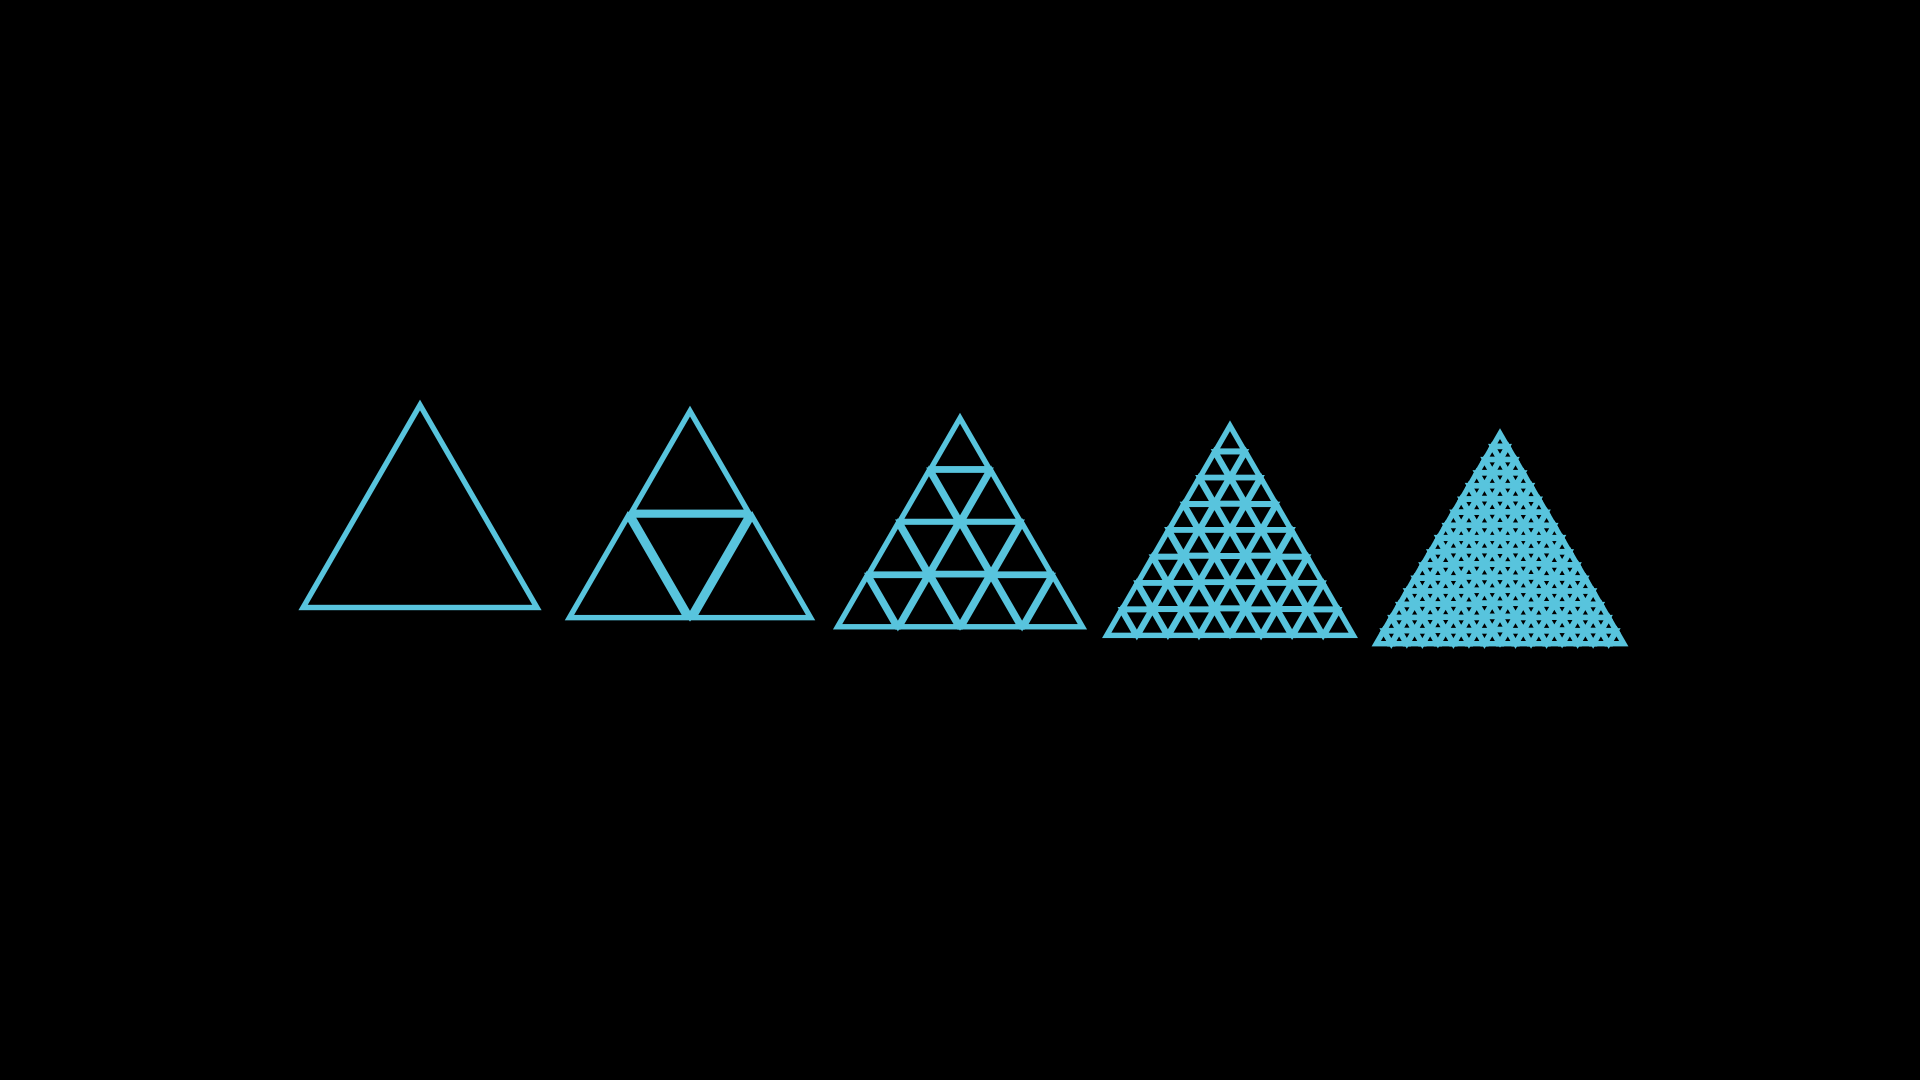

In [58]:
%%manim -s -v WARNING TrianguloTest

def create_triangles(n):
    if n == 1:
        return Triangle()
    else:
        return VGroup(
            create_triangles(n-1).scale(0.5).shift(0.33*UP),
            create_triangles(n-1).scale(0.5).shift(0.46*LEFT + 0.45*DOWN),
            create_triangles(n-1).scale(0.5).shift(0.46*RIGHT + 0.45*DOWN),
            create_triangles(n-1).scale(0.5).shift(0.44*DOWN).rotate(180*DEGREES),
        )



class TrianguloTest(Scene):
    def construct(self):
        triangulos = VGroup(*[
            create_triangles(i).shift(6*LEFT + 2*i*RIGHT) for i in range(1, 6)
        ])
        self.add(triangulos)

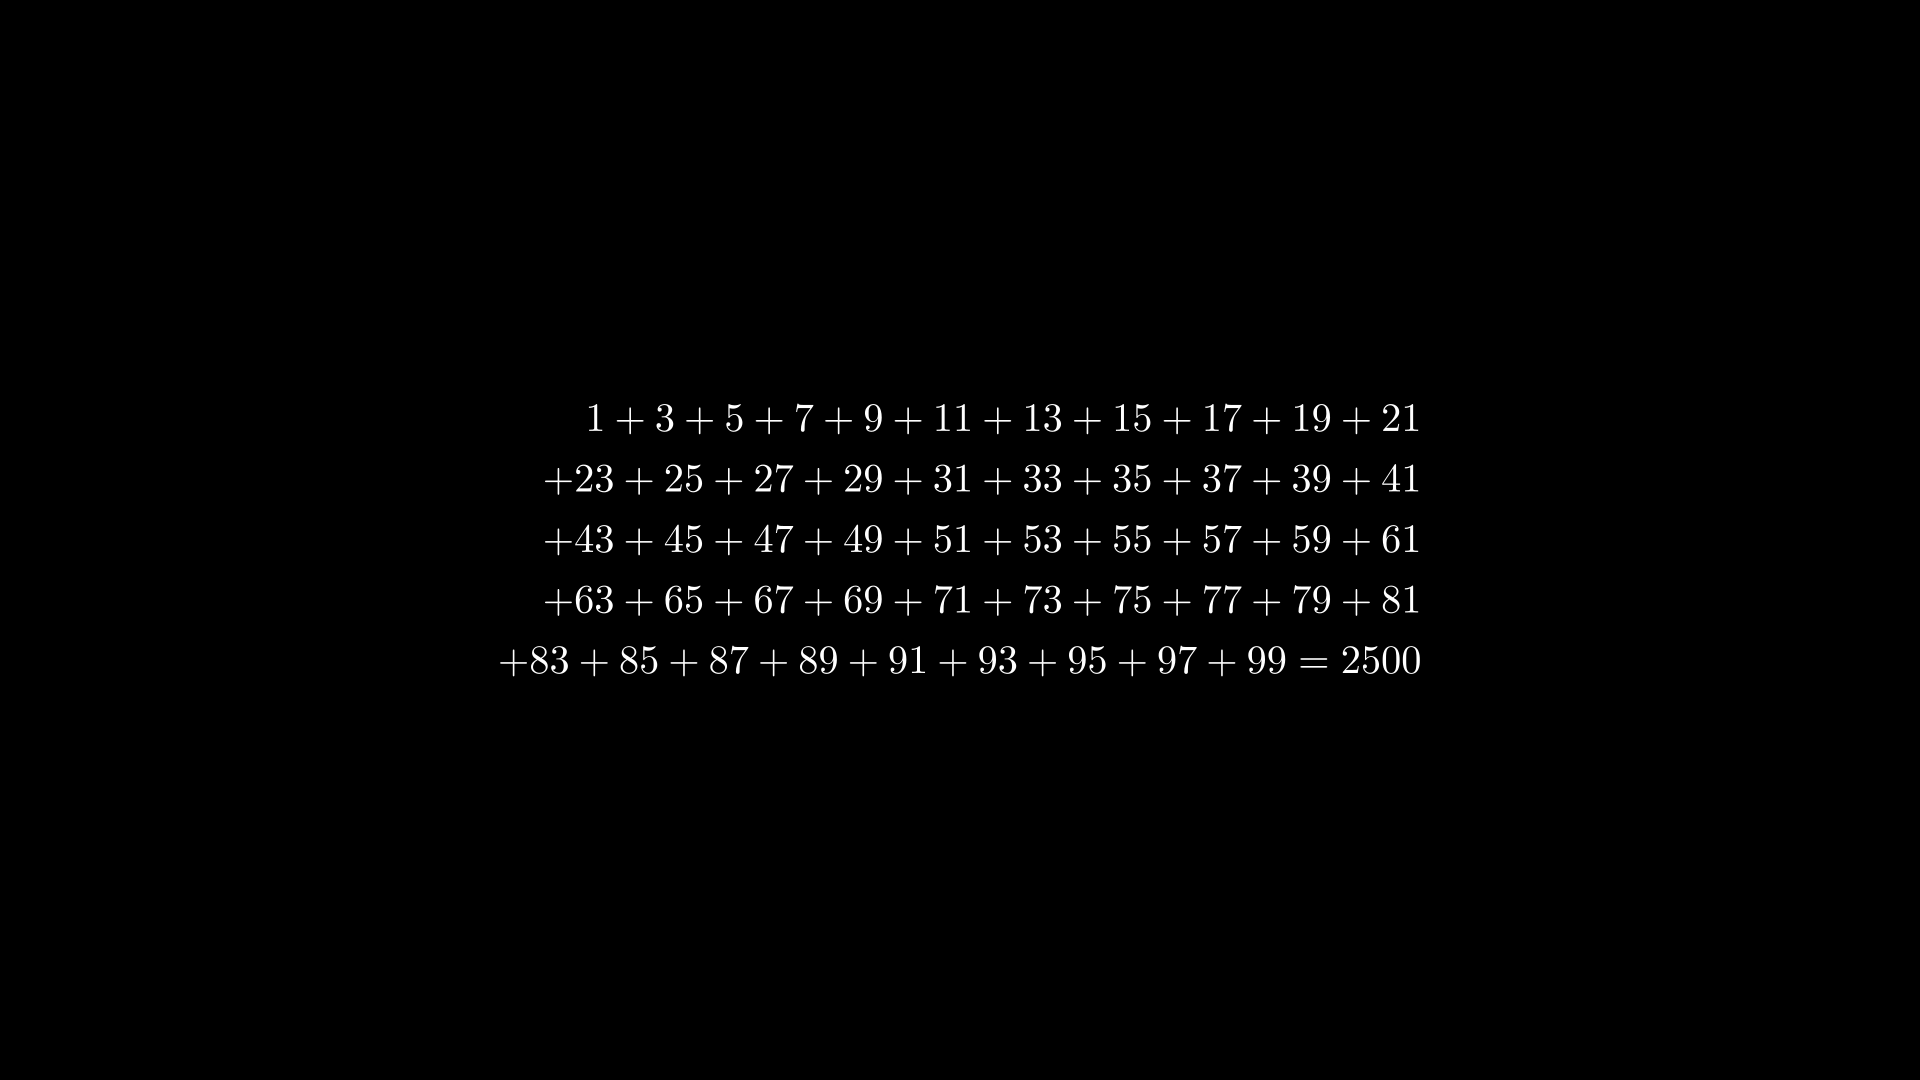

In [71]:
%%manim -s -v WARNING Progressao

class Progressao(Scene):
    def construct(self):
        text = ' + '.join([
            f'{2*i + 1}' 
            if i % 10 != 0 or i == 0
            else rf'{2*i + 1} \\' 
            for i in range(0, 50)
        ]) + ' = 2500'
        tex = MathTex(text).scale(0.6)
        self.add(tex)


In [60]:
len([
            f'{2*i + 1}' 
            if i % 11 != 0 and i != 0
            else rf'{2*i + 1} \\' 
            for i in range(0, 50)
        ])


50

In [69]:
pa_somatorio = lambda start, end, n: (start + end)/2 * n
pa_somatorio(1, 99, 50)

2500.0

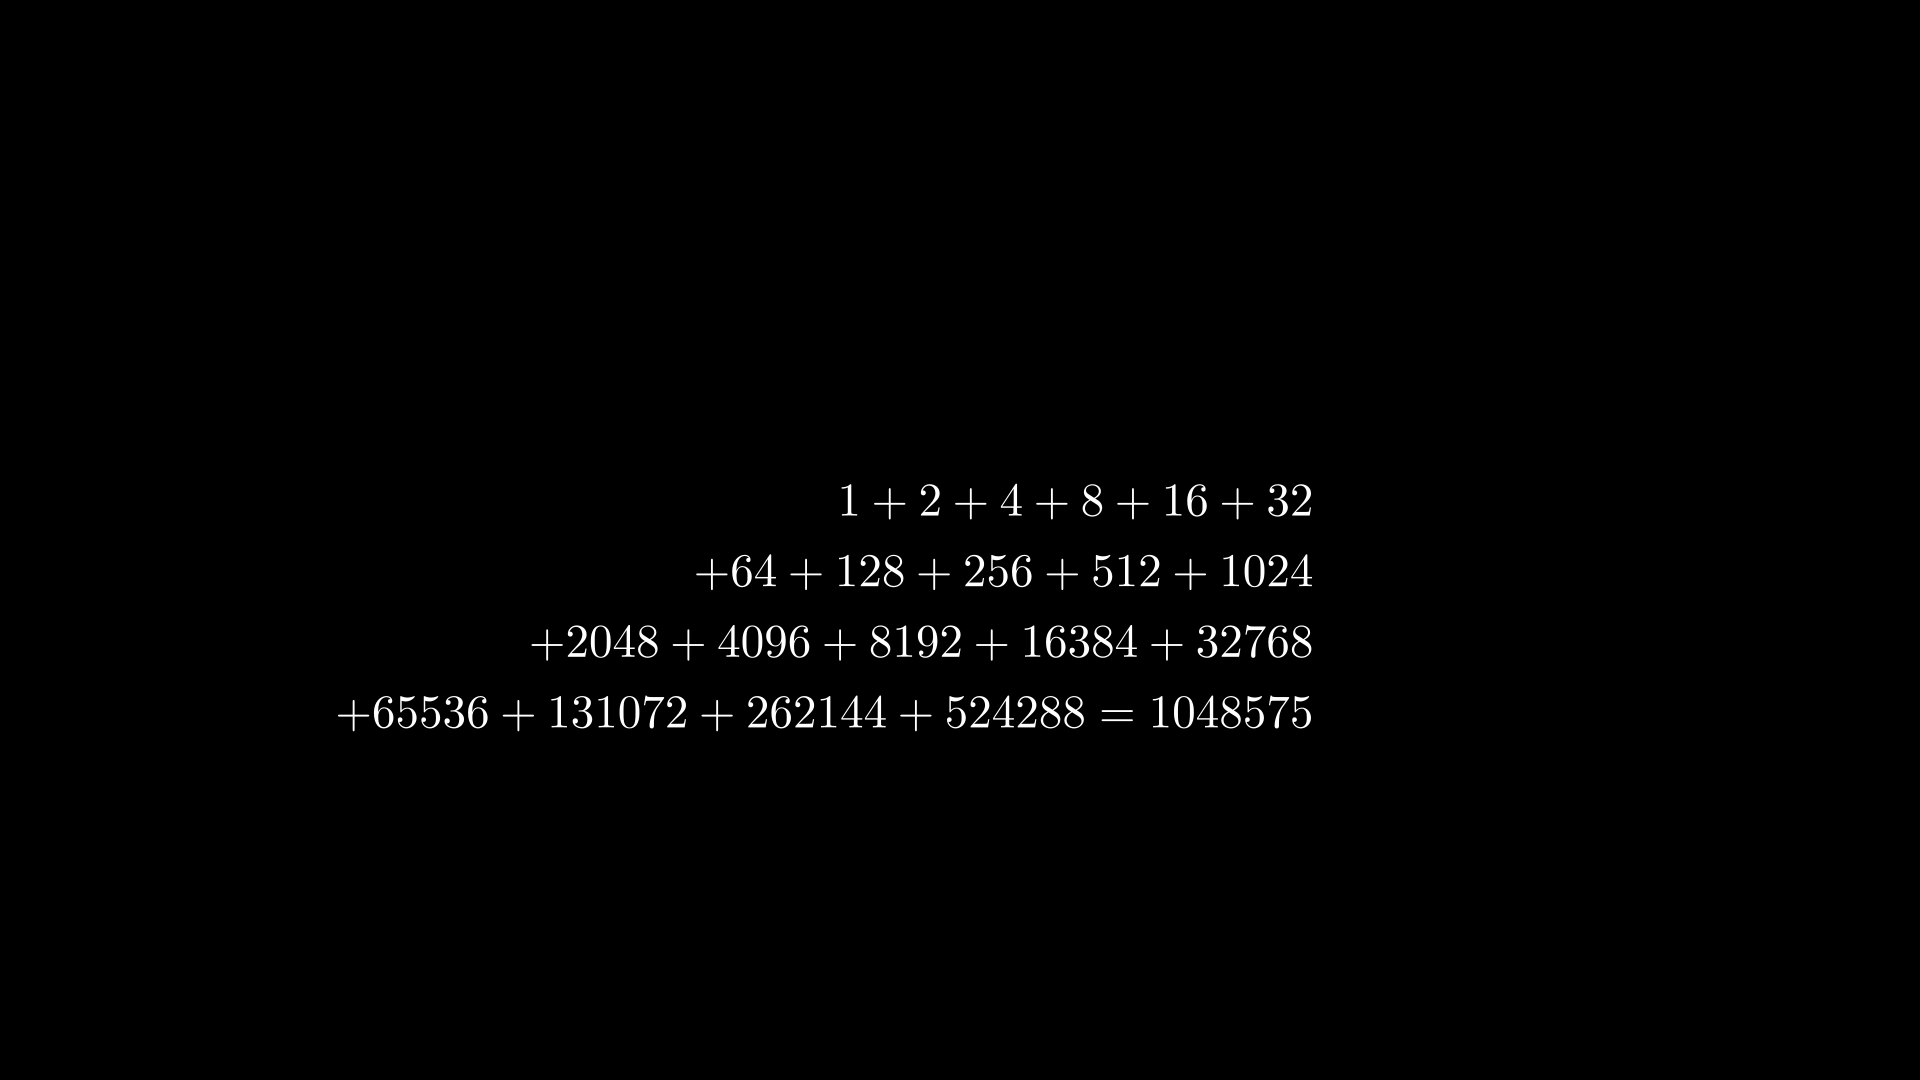

In [7]:
%%manim -s -v WARNING Somatorio

pg = lambda a1, r, n: a1 * r**(n - 1)
somatorio_pg = lambda a1, r, n: a1 * (r**n - 1)/(r - 1)

class Somatorio(Scene):
    def construct(self):
        str_somatorio = ' + '.join([
            f'{pg(1, 2, i+1)}' 
            if i % 5 != 0 or i == 0
            else rf'{pg(1, 2, i+1)} \\' 
            for i in range(0, 20)
        ]) + f' = {int(somatorio_pg(1, 2, 20))}'
        somatorio_manual = MathTex(str_somatorio).scale(0.7).shift(0.5*DOWN + LEFT)
        self.add(somatorio_manual)

In [12]:
somatorio = lambda a1, r, n: a1 * (r**(n-1)) / (r - 1)
somatorio(1, 2, 50)
pg = lambda a1, r, n: a1 * r**(n - 1)
pg(1, 2, 3)
sum([pg(1, 2, i+1) for i in range(0, 20)])

1048575

In [112]:
        
%%manim -pql -v WARNING Roupa

class Camiseta(Polygon):
    def __init__(self, color=BLUE, fill_color=BLUE, fill_opacity=1, **kwargs):
        vertices = [
            ORIGIN, 4*RIGHT, 6*RIGHT + 2*DOWN, 5*RIGHT + 3*DOWN, 4*RIGHT + 2*DOWN, 4*RIGHT + 7*DOWN,
            7*DOWN, 2*DOWN, 3*DOWN + LEFT, 2*DOWN + 2*LEFT, ORIGIN
        ]
        super().__init__(*vertices, color=color, fill_opacity=fill_opacity, **kwargs)
        self.scale(0.25).shift(2*LEFT + 4*UP).set_fill(fill_color)


class Calca(Polygon):
    def __init__(self, color=BLUE, fill_color=BLUE, fill_opacity=1, **kwargs):
        vertices = [
            ORIGIN, 6*RIGHT, 6*RIGHT + 9*DOWN, 4*RIGHT + 9*DOWN, 3*RIGHT+DOWN, 2*RIGHT + 9*DOWN, 9*DOWN, ORIGIN
        ]
        super().__init__(*vertices, color=color, fill_opacity=fill_opacity, **kwargs)
        self.scale(0.15).shift(2*LEFT + 4*UP).set_fill(fill_color)

class Roupa(Scene):
    def construct(self):
        def play(*anim, run=2, wait=2):
            self.play(*anim, run_time=run)
            self.wait(wait)
        introducao = Tex(
            r'\raggedright Problemas de contagem aparecem frequentemente no cotidiano. É isso que a Combinatória estuda.', 
            'Por exemplo, de quantas formas podemos combinar 2 calças e 3 camisetas. Podemos visualizar com o seguinte esquema.'
        ).scale(0.7).to_corner(UP)
        principio_fundamental_contagem = Tex(
            r'raggedright É isso que o princípio fundamental da contagem fala. Se há $x$ modos de tomar uma decisão $D_1$ e $y$ modos de tomar a decisão $D_2$, então o número de tomar sucessivamente as decisões é $x \cdot y$'
        ).scale(0.7).to_corner(DOWN)

        esquema_roupas = VGroup(
            Calca().scale(0.7),
            Calca(color=RED, fill_color=RED).shift(4*RIGHT).scale(0.7),
            Camiseta().scale(0.5).shift(0.1*LEFT + 3*DOWN),
            Camiseta(RED, RED).scale(0.5).shift(RIGHT + 3*DOWN),
            Camiseta(YELLOW, YELLOW).scale(0.5).shift(2.1*RIGHT + 3*DOWN),
            Camiseta(BLUE, BLUE).scale(0.5).shift(3.9*RIGHT + 3*DOWN),
            Camiseta(RED, RED).scale(0.5).shift(5*RIGHT + 3*DOWN),
            Camiseta(YELLOW, YELLOW).scale(0.5).shift(6.1*RIGHT + 3*DOWN),
            Line(RIGHT+DOWN, 0.1*LEFT + 2*DOWN),
            Line(RIGHT+DOWN, RIGHT + 2*DOWN),
            Line(RIGHT+DOWN, 2.1*RIGHT + 2*DOWN),
            Line(RIGHT+DOWN, 0.1*LEFT + 2*DOWN).shift(4*RIGHT),
            Line(RIGHT+DOWN, RIGHT + 2*DOWN).shift(4*RIGHT),
            Line(RIGHT+DOWN, 2.1*RIGHT + 2*DOWN).shift(4*RIGHT),
        ).shift(3*LEFT + 2*UP)

        play(Write(introducao))
        play(FadeIn(esquema_roupas))
        play(Write(principio_fundamental_contagem))

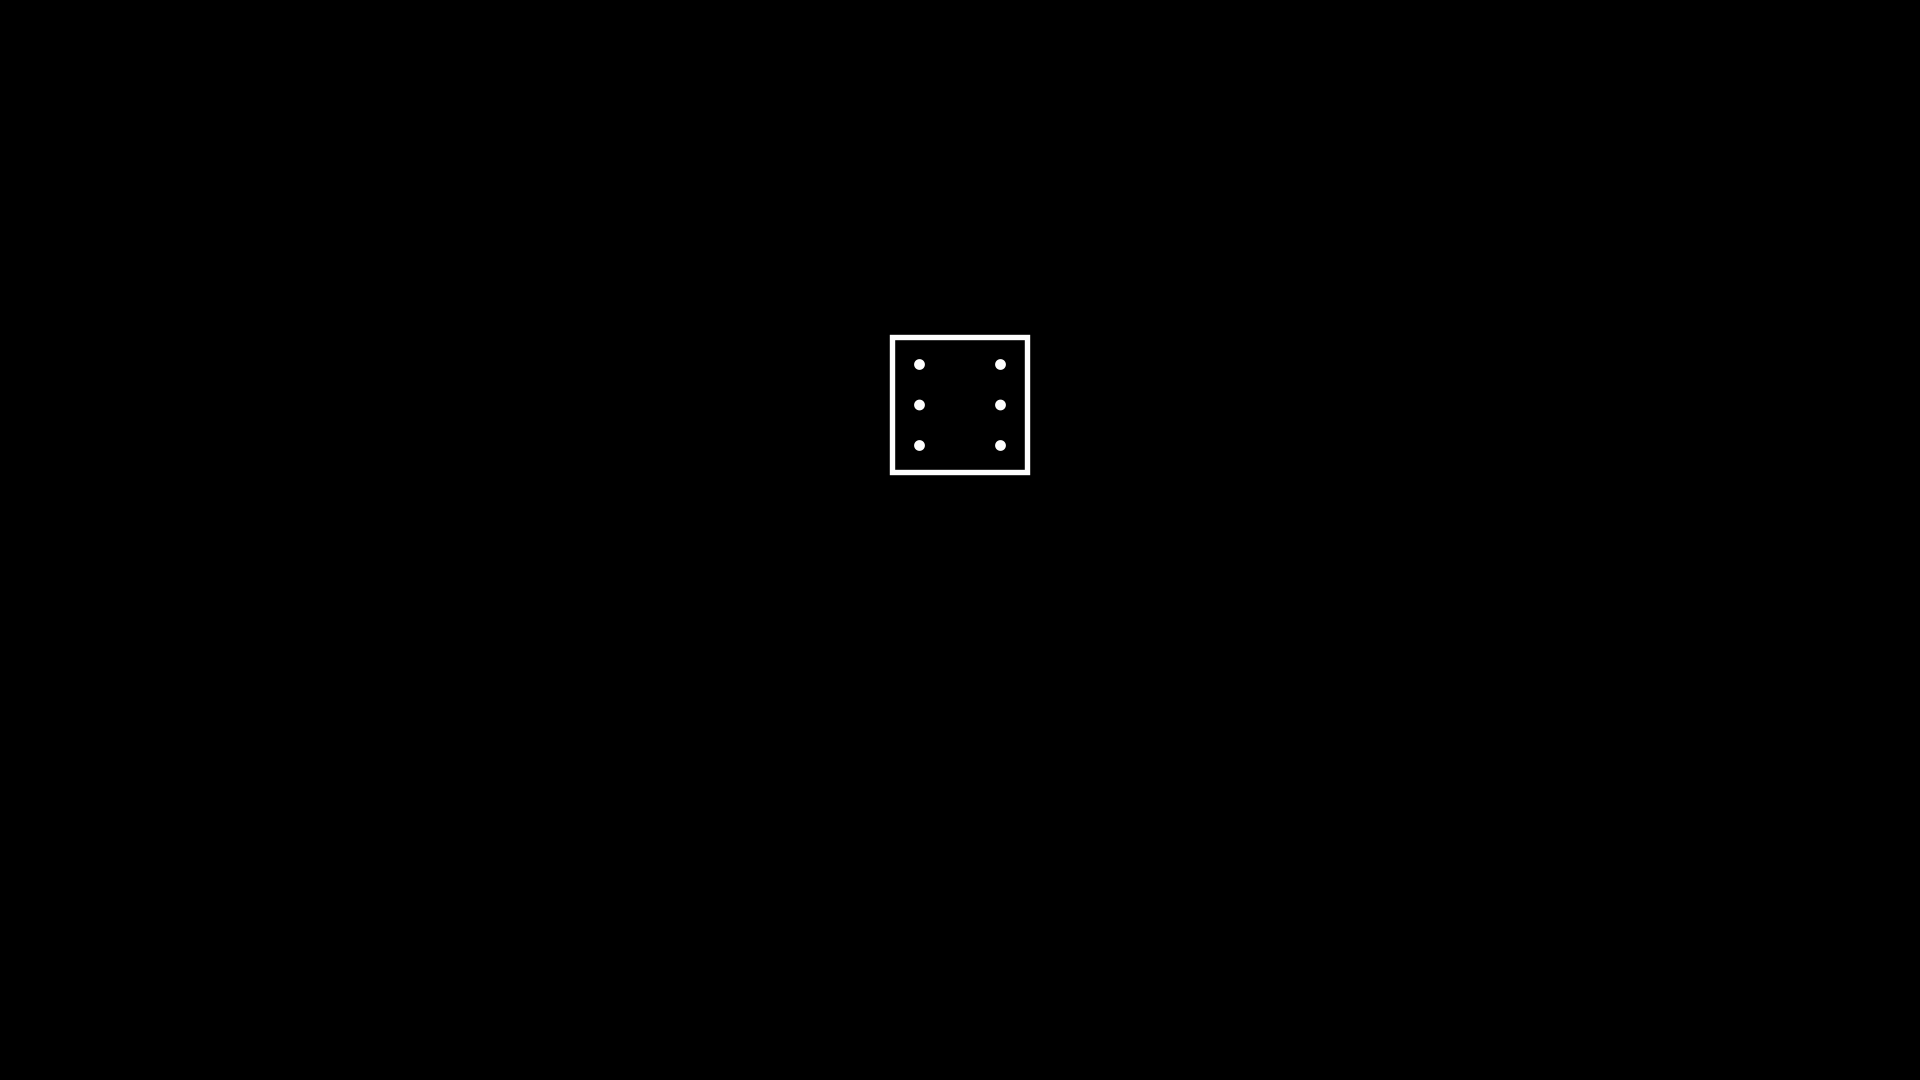

In [20]:
%%manim -s -v WARNING DadoCena

class Dado(VGroup):
    def __init__(self, side_length=2, number=1,  *vmobjects, **kwargs):
        super().__init__(*vmobjects, **kwargs)
        self.add(Square(side_length))
        if number == 1:
            self.add(Dot(self.get_center()))
        elif number == 2:
            self.add(Dot(0.3*side_length*UP + 0.3*side_length*LEFT))
            self.add(Dot(0.3*side_length*DOWN + 0.3*side_length*RIGHT))
        elif number == 3:
            self.add(Dot(0.3*side_length*UP + 0.3*side_length*LEFT))
            self.add(Dot(0.3*side_length*DOWN + 0.3*side_length*RIGHT))
            self.add(Dot())
        elif number == 4:
            self.add(Dot(0.3*side_length*UP + 0.3*side_length*LEFT))
            self.add(Dot(0.3*side_length*UP + 0.3*side_length*RIGHT))
            self.add(Dot(0.3*side_length*DOWN + 0.3*side_length*LEFT))
            self.add(Dot(0.3*side_length*DOWN + 0.3*side_length*RIGHT))
        elif number == 5:
            self.add(Dot(0.3*side_length*UP + 0.3*side_length*LEFT))
            self.add(Dot(0.3*side_length*UP + 0.3*side_length*RIGHT))
            self.add(Dot(0.3*side_length*DOWN + 0.3*side_length*LEFT))
            self.add(Dot(0.3*side_length*DOWN + 0.3*side_length*RIGHT))
            self.add(Dot())
        elif number == 6:
            self.add(Dot(0.3*side_length*UP + 0.3*side_length*LEFT))
            self.add(Dot(0.3*side_length*UP + 0.3*side_length*RIGHT))
            self.add(Dot(0.3*side_length*DOWN + 0.3*side_length*LEFT))
            self.add(Dot(0.3*side_length*DOWN + 0.3*side_length*RIGHT))
            self.add(Dot(0.3*side_length*LEFT))
            self.add(Dot(0.3*side_length*RIGHT))

class DadoCena(Scene):
    def construct(self):
        self.add(Dado(number=6).move_to(UP).scale(0.5))

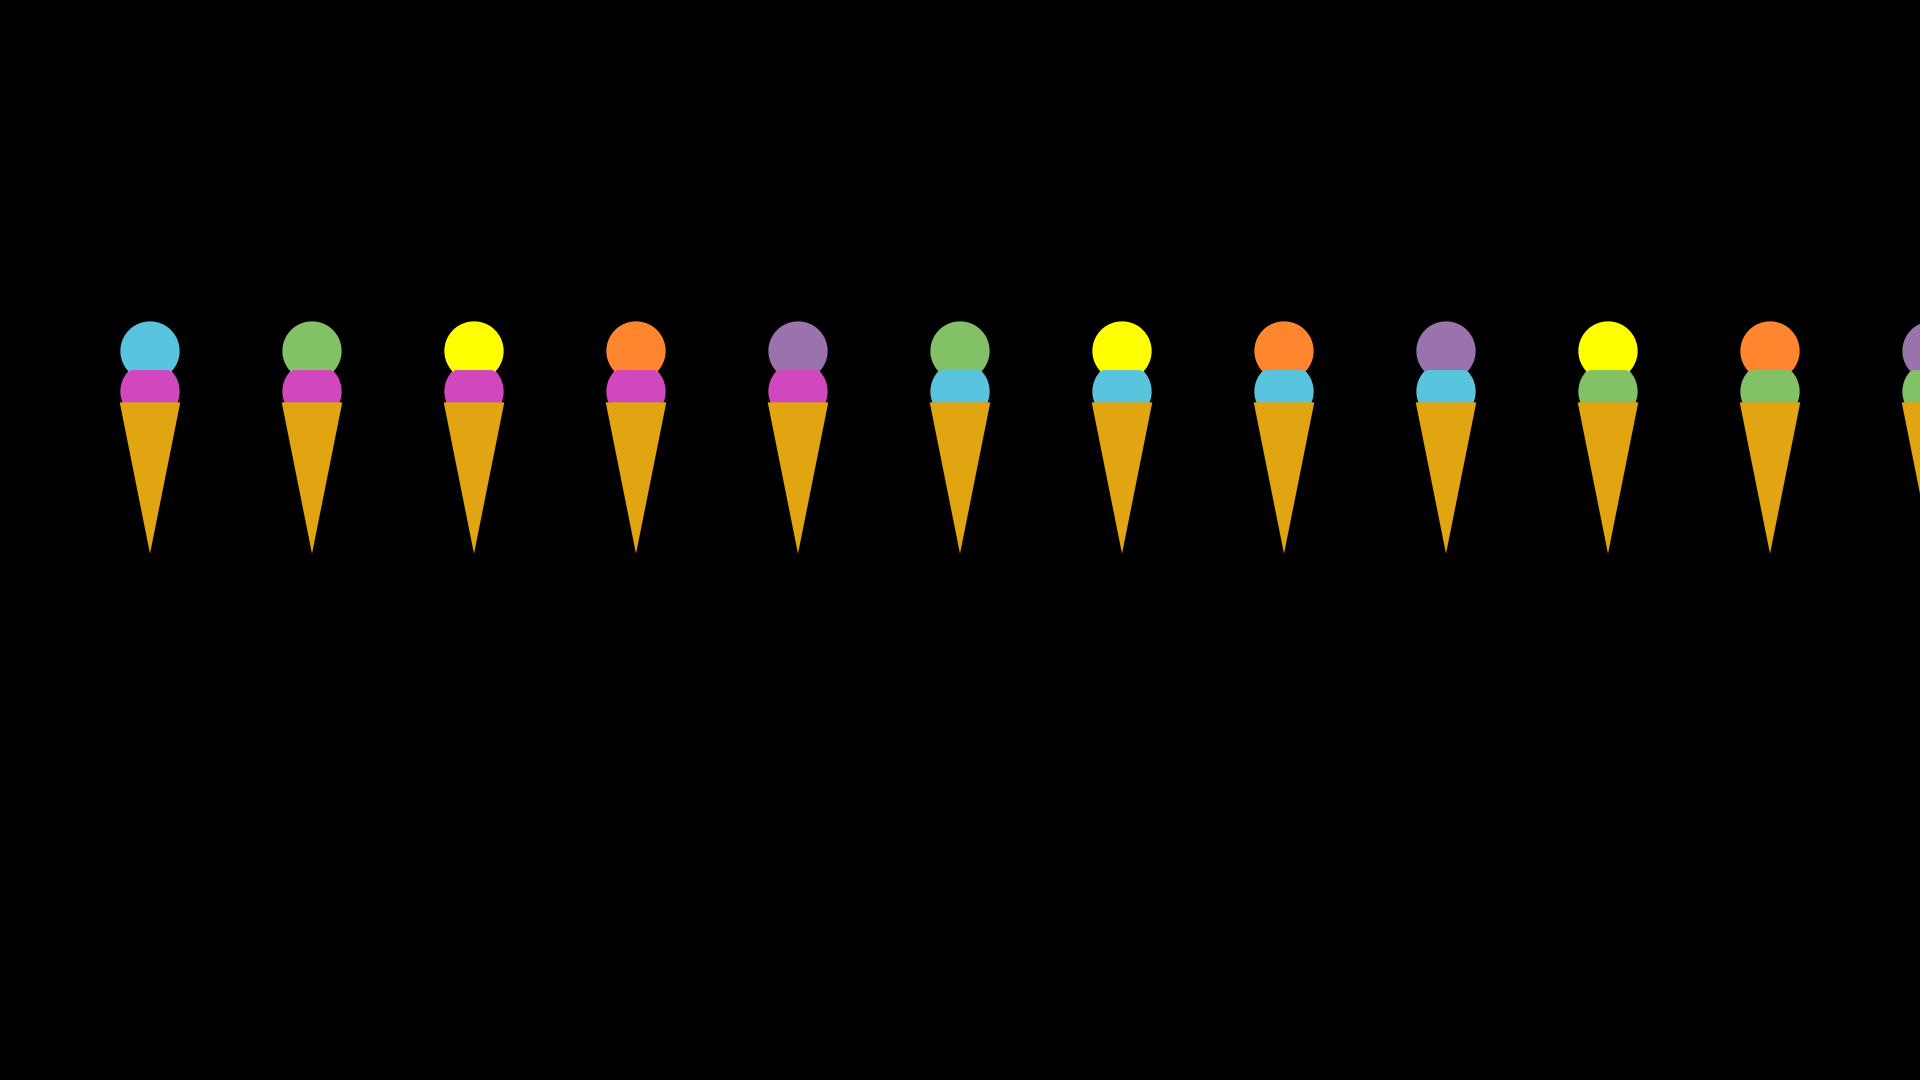

In [30]:
%%manim -s -v WARNING SorveteCena

class Sorvete2Sabores(VGroup):
    def __init__(self, color1=DARK_BROWN, color2=PINK, *vmobjects, **kwargs):
        super().__init__(*vmobjects, **kwargs)
        self.add(Arc(radius=0.2, start_angle=-45*DEGREES, angle=270*DEGREES, color=color1, fill_color=color1, fill_opacity=1).shift(0.1*UP))
        self.add(Arc(radius=0.2, start_angle=-45*DEGREES, angle=270*DEGREES, color=color2, fill_color=color2, fill_opacity=1).shift(0.4*UP))
        self.add(Polygon(0.2*LEFT, 0.2*RIGHT, DOWN, color='#e0a510', fill_color='#e0a510', fill_opacity=1))

class SorveteCena(Scene):
    def construct(self):
        sabores = [PINK, BLUE, GREEN, YELLOW, ORANGE, PURPLE]
        cores = [
            (sabores[i], sabores[j])
            for i in range(len(sabores))
            for j in range(i+1, len(sabores))
        ]
        sorvetes = VGroup(*[
            Sorvete2Sabores(color1=cores[i][0], color2=cores[i][1]).scale(1).shift(UP + 6*LEFT + i*1.2*RIGHT)
            for i in range(len(cores))
        ])
        self.add(sorvetes)

In [93]:
sabores = ['PINK', 'BLUE', 'GREEN', 'YELLOW', 'ORANGE', 'PURPLE']
cores = [
    (sabores[i], sabores[j])
    for i in range(len(sabores))
    for j in range(i+1, len(sabores))
]


[('PINK', 'BLUE'),
 ('PINK', 'GREEN'),
 ('PINK', 'YELLOW'),
 ('PINK', 'ORANGE'),
 ('PINK', 'PURPLE'),
 ('BLUE', 'GREEN'),
 ('BLUE', 'YELLOW'),
 ('BLUE', 'ORANGE'),
 ('BLUE', 'PURPLE'),
 ('GREEN', 'YELLOW'),
 ('GREEN', 'ORANGE'),
 ('GREEN', 'PURPLE'),
 ('YELLOW', 'ORANGE'),
 ('YELLOW', 'PURPLE'),
 ('ORANGE', 'PURPLE')]